In [53]:
##import required library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [54]:
##load the dataset
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\GUVI\PROJECT HUMAN VOICE CLASSIFICATION\human voice dataset.csv")

In [55]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [57]:
df.shape

(16148, 44)

In [58]:
df.dtypes

mean_spectral_centroid     float64
std_spectral_centroid      float64
mean_spectral_bandwidth    float64
std_spectral_bandwidth     float64
mean_spectral_contrast     float64
mean_spectral_flatness     float64
mean_spectral_rolloff      float64
zero_crossing_rate         float64
rms_energy                 float64
mean_pitch                 float64
min_pitch                  float64
max_pitch                  float64
std_pitch                  float64
spectral_skew              float64
spectral_kurtosis          float64
energy_entropy             float64
log_energy                 float64
mfcc_1_mean                float64
mfcc_1_std                 float64
mfcc_2_mean                float64
mfcc_2_std                 float64
mfcc_3_mean                float64
mfcc_3_std                 float64
mfcc_4_mean                float64
mfcc_4_std                 float64
mfcc_5_mean                float64
mfcc_5_std                 float64
mfcc_6_mean                float64
mfcc_6_std          

In [59]:
df.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_spectral_centroid,16148.0,1709.269730,315.558063,719.559285,1475.078509,1703.038854,1921.202685,3059.390150
std_spectral_centroid,16148.0,1027.564673,286.303662,194.998983,829.195585,1048.531356,1233.451527,1912.173446
mean_spectral_bandwidth,16148.0,1584.195931,126.360465,1106.939002,1503.301521,1583.959951,1665.806788,2046.070801
std_spectral_bandwidth,16148.0,432.492328,78.723202,199.321584,379.552391,423.121818,477.631817,724.361505
mean_spectral_contrast,16148.0,20.395652,1.628596,15.154801,19.775875,20.759579,21.516436,24.907725
mean_spectral_flatness,16148.0,0.023086,0.010027,0.001816,0.015567,0.021737,0.029175,0.072172
mean_spectral_rolloff,16148.0,3281.808257,526.824341,1310.661765,2911.427573,3293.459741,3637.773812,5451.099537
zero_crossing_rate,16148.0,0.118088,0.037707,0.027727,0.089729,0.116623,0.144095,0.270710
rms_energy,16148.0,0.084759,0.022814,0.022425,0.067508,0.083121,0.100465,0.187577
mean_pitch,16148.0,1461.624198,287.763342,359.391170,1279.141250,1484.461250,1662.883350,2454.724000


In [61]:
df.duplicated().sum()

np.int64(1078)

In [62]:
duplicates=df[df.duplicated()]

In [63]:
duplicates

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
4153,1412.128910,920.473327,1414.160017,622.996586,22.248629,0.032454,2865.740741,0.062500,0.133391,1282.4385,...,13.418416,-6.713120,10.089062,-9.737516,10.000673,-3.583986,7.366380,-7.657676,8.581247,0
4156,1350.984280,697.583027,1405.091432,497.950051,21.674845,0.025402,2785.982572,0.086581,0.102512,1293.0490,...,13.047665,-6.953734,10.334755,-7.955184,7.243159,-6.843229,9.650276,-7.887499,9.204149,0
4159,1700.003436,1139.849988,1563.882152,591.271918,21.496923,0.024522,3284.975962,0.130687,0.115451,1374.5704,...,14.525292,-3.543442,7.883509,-13.231023,12.112495,-2.378820,7.745978,-11.122815,9.117839,0
4162,1603.435295,1098.400082,1504.251367,539.193703,22.398801,0.026613,3160.000000,0.102539,0.124267,1408.1073,...,16.980540,-6.776709,10.832165,-12.774789,9.733416,-3.940550,9.073194,-11.923497,8.665192,0
4165,2232.938291,1631.809654,1651.055700,612.490155,20.603783,0.047873,3923.056723,0.213629,0.101999,1615.0890,...,12.989914,-1.322290,11.655929,-8.510401,8.701939,1.662079,11.599171,-6.811781,7.187591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,1831.290901,1095.657669,1507.126905,441.370106,20.577582,0.023060,3381.093750,0.161582,0.063989,1519.1984,...,13.705769,2.318734,15.737608,-12.732199,9.730263,2.649397,10.108326,-13.013725,13.253206,1
16046,1674.069934,689.702062,1595.336488,350.695179,19.293286,0.032054,3384.114583,0.105499,0.077688,1682.6837,...,10.386293,-4.007985,17.626696,-5.365382,10.082510,4.642905,8.370355,-8.685815,10.766263,1
16053,1729.333727,924.972131,1511.611165,379.952701,19.899175,0.024843,3433.225236,0.123876,0.086999,1576.6437,...,10.382106,5.488963,16.886936,-16.970497,11.435887,6.402531,8.549980,-13.403180,10.182811,1
16060,2390.192041,1371.257338,1654.646816,447.120204,20.030245,0.037977,4174.310065,0.195306,0.074226,1775.7415,...,13.382373,5.654511,17.184233,-13.719124,9.047874,4.419389,8.628943,-6.299057,8.608444,1


In [64]:
##drop duplicated rows 
df=df.drop_duplicates()

In [65]:
##again checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [32]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X = features (excluding label), y = target (label: 0 or 1)
x= df.drop("label", axis=1)
y = df["label"]

# Train-test split before SMOTE (to avoid data leakage)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check class distribution after SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE: ", Counter(y_train_resampled))


Before SMOTE: Counter({1: 7873, 0: 4183})
After SMOTE:  Counter({1: 7873, 0: 7873})


In [78]:
## normalize numeric feature to remove inconsistency 
#separate features and target
x=df.drop("label",axis=1)##feature
y=df["label"]##label

In [89]:
# Assuming you already have your DataFrame `df`
top_13 = ['mfcc_4_std', 'mfcc_5_std', 'mfcc_4_mean', 'mfcc_5_mean',
          'mean_spectral_flatness', 'mfcc_1_mean', 'mfcc_7_mean',
          'mfcc_1_std', 'mfcc_8_mean', 'zero_crossing_rate',
           'mfcc_2_std', 'mfcc_10_mean','mfcc_12_mean']

x = df[top_13]
y = df['label']

# Normalize & train
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

scaler_13 = MinMaxScaler()
x_scaled = scaler_13.fit_transform(x)

model_13 = RandomForestClassifier()
model_13.fit(x_scaled, y)

# Save model and scaler
joblib.dump(scaler_13, "scaler_13.pkl")
joblib.dump(model_13, "model_13.pkl")


['model_13.pkl']

In [90]:
x.head()

,mfcc_4_std,mfcc_5_std,mfcc_4_mean,mfcc_5_mean,mean_spectral_flatness,mfcc_1_mean,mfcc_7_mean,mfcc_1_std,mfcc_8_mean,zero_crossing_rate,mfcc_2_std,mfcc_10_mean,mfcc_12_mean
0,29.816553,20.791132,32.507935,-11.243851,0.036879,-246.96200,-19.955850,103.95492,5.746707,0.169241,38.245247,2.303085,0.301804
1,27.258125,17.085749,27.370947,-13.399975,0.018936,-257.23755,-9.883782,90.96665,-14.292689,0.108068,40.398624,-0.953942,-7.281142
2,28.831856,25.517390,26.635605,-10.213086,0.032616,-273.87130,-15.503926,112.95775,-5.143653,0.144633,48.722652,0.260098,-0.199829
3,29.352741,23.343740,23.888018,-0.438690,0.028482,-353.47635,1.403247,142.38920,-7.792498,0.148933,56.540092,-1.486122,3.997028
4,31.573534,28.853691,39.914925,-10.350270,0.025737,-284.60983,-23.084660,106.86164,-8.609181,0.117961,49.315365,-3.366364,1.410639


In [91]:
df["label"].value_counts()

label
1    9841
0    5229
Name: count, dtype: int64

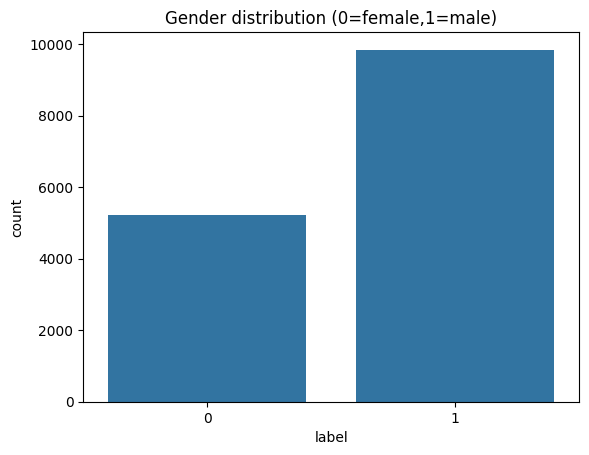

In [92]:
##class distribution 
sns.countplot(x="label",data=df)
plt.title("Gender distribution (0=female,1=male)")
plt.show()

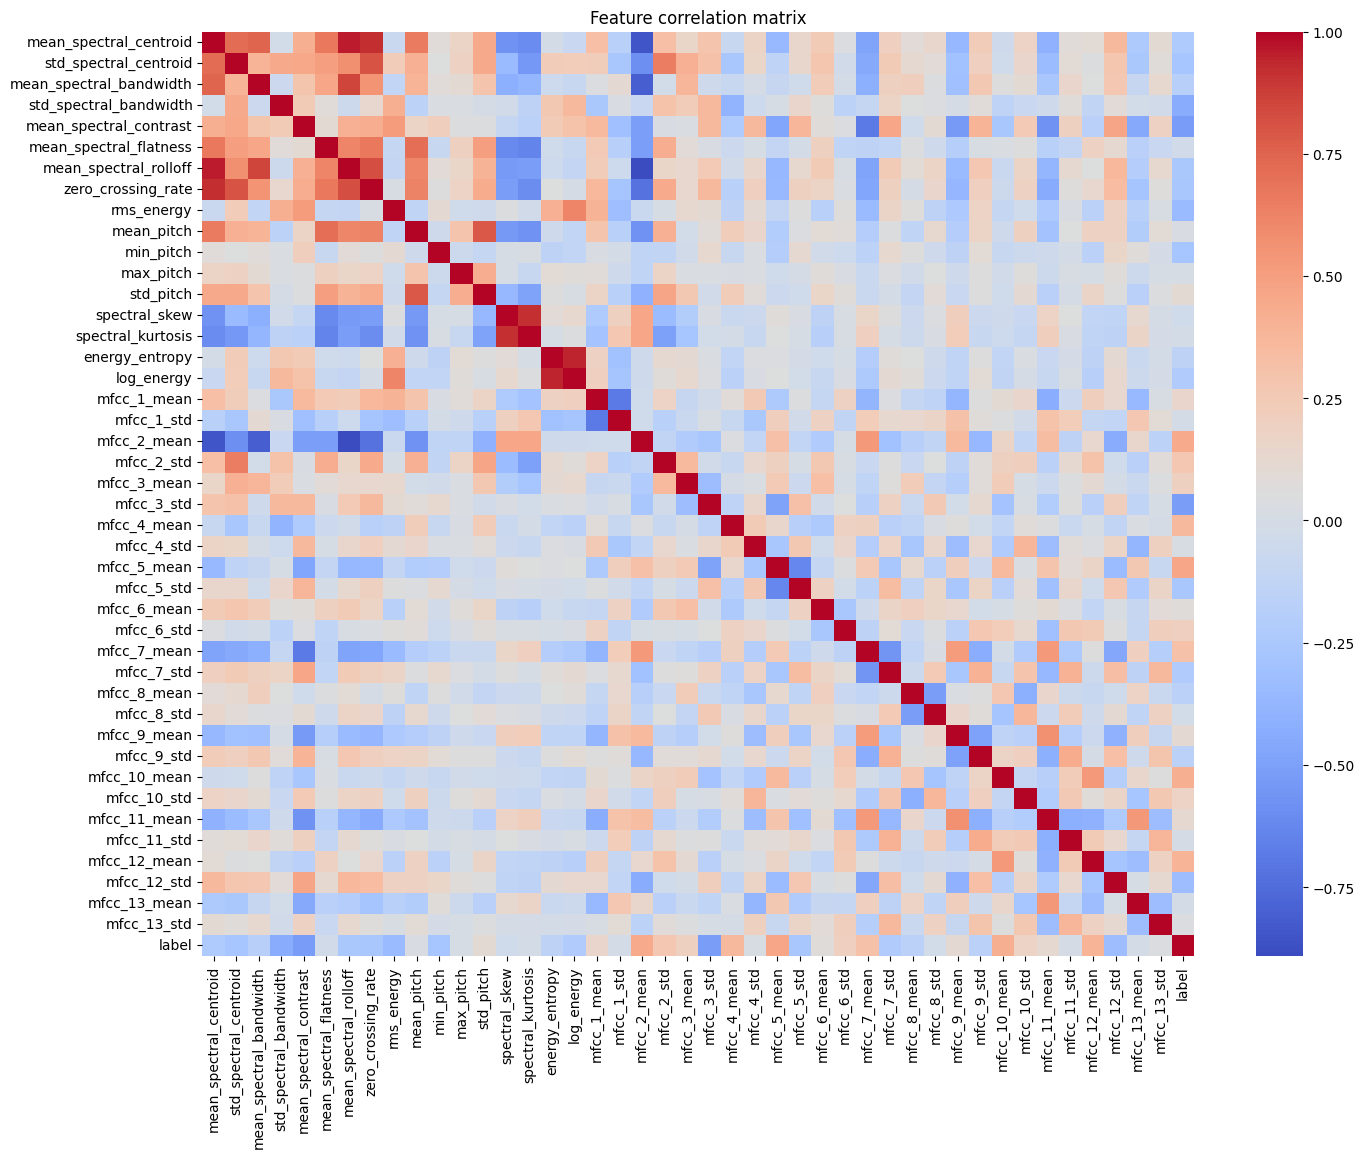

In [93]:
##correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap="coolwarm",annot=False)
plt.title("Feature correlation matrix")
plt.show()

CLASS WISE FEATURE DISTRIBUTION

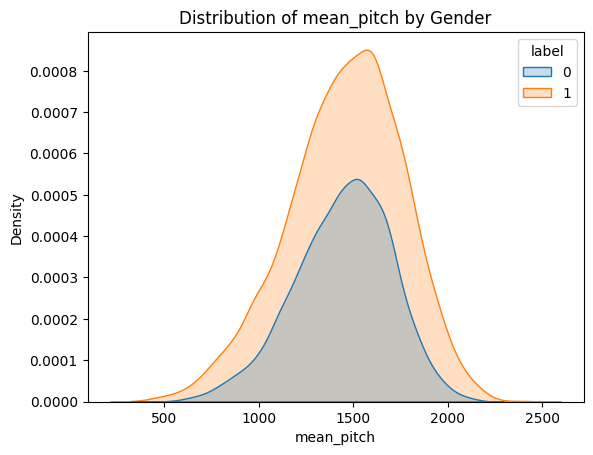

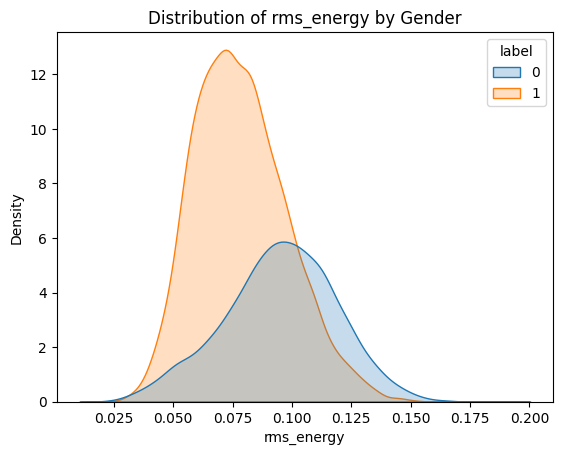

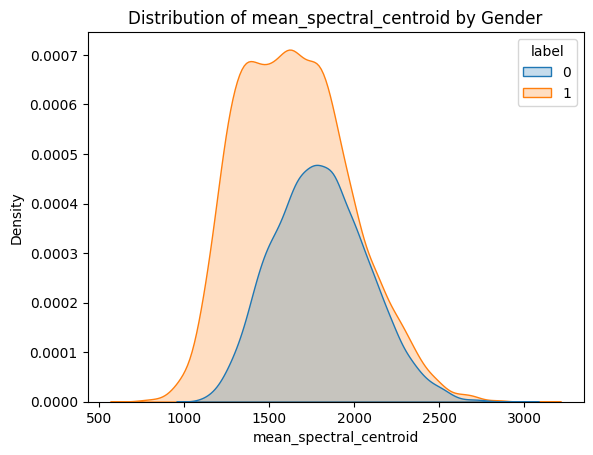

In [40]:
features = ['mean_pitch', 'rms_energy', 'mean_spectral_centroid']

for feature in features:
    plt.figure()
    sns.kdeplot(data=df, x=feature, hue='label', fill=True)
    plt.title(f'Distribution of {feature} by Gender')
    plt.show()


##BOXPLOT TO DETECT OUTLINERS

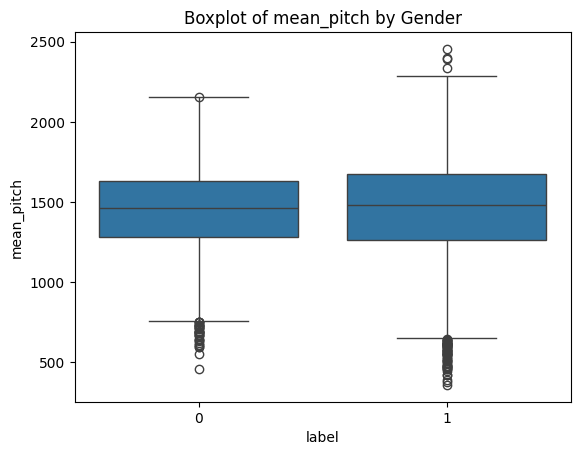

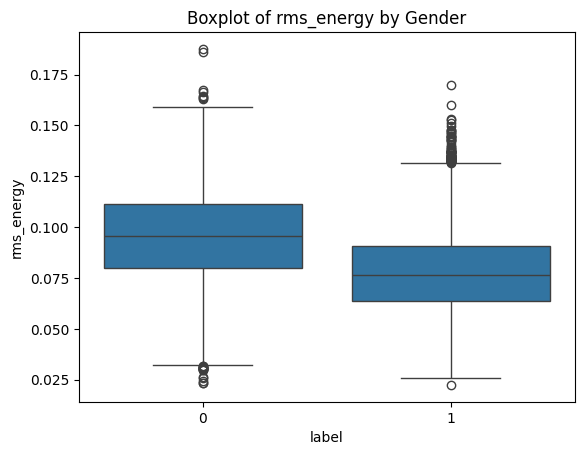

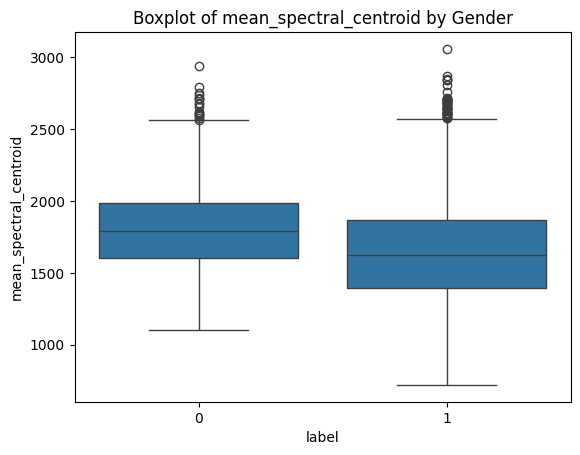

In [41]:
for feature in ['mean_pitch', 'rms_energy', 'mean_spectral_centroid']:
    plt.figure()
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Gender')
    plt.show()


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize KMeans with 2 clusters (as we expect male/female)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit(x_scaled)





In [43]:
prediction=kmeans.predict(x_scaled)
df["GROUP"]=prediction
df[df["GROUP"]==0]

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label,GROUP
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1,0
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1,0
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1,0
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1,0


In [44]:
df[df["GROUP"]==1]

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label,GROUP
29,1338.110324,519.861219,1493.175257,263.952026,22.353700,0.010863,2636.379076,0.073094,0.102996,1311.96220,...,-8.703977,11.494500,0.487967,8.660800,-9.207306,9.636980,-0.799582,7.844932,0,1
30,1353.242972,494.166990,1498.942968,378.269826,22.040189,0.010366,2782.063802,0.072510,0.106896,1472.30440,...,-9.846975,12.344796,1.194799,9.528783,-2.995975,9.256916,3.528168,6.404761,0,1
36,1399.502053,719.864339,1539.496403,384.963856,22.099622,0.011264,2708.671875,0.078232,0.074198,993.66340,...,-4.911771,9.181850,0.074140,10.016102,-11.830440,12.079414,-4.403315,7.441326,0,1
71,1430.457627,513.688709,1597.925767,306.039654,22.935732,0.007149,2937.729779,0.061964,0.114293,853.78064,...,-3.351478,10.107531,-2.854889,8.365604,-6.798584,8.065342,-1.943006,6.154463,0,1
76,1184.160957,765.605137,1278.838686,545.336711,23.185468,0.026079,2420.768805,0.078492,0.112129,1286.27370,...,-10.524935,10.364840,-9.147074,9.009662,-5.833105,7.376631,-10.835886,7.654785,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,1605.547553,848.985691,1792.155292,524.327824,18.429915,0.012006,3597.994291,0.081512,0.054546,1618.01160,...,-1.704865,15.478519,-3.447308,13.160048,6.804118,7.457691,-3.471292,12.864229,1,1
16126,1624.303922,985.472105,1758.111828,538.773574,18.915919,0.013338,3545.034555,0.083959,0.042829,1311.43370,...,-0.988207,14.057353,-2.028324,11.329276,5.248553,7.942554,-5.732666,13.243459,1,1
16130,1475.038808,731.767940,1718.710261,572.373892,19.072673,0.012414,3351.113935,0.065965,0.071260,1133.84480,...,-3.984437,16.810186,-2.427254,11.672913,6.274439,7.337238,-4.652115,13.155356,1,1
16131,1474.740769,720.840105,1763.905180,487.015674,19.031834,0.009339,3335.186298,0.064423,0.038773,1050.79040,...,-3.667525,16.115930,-3.188324,13.497193,3.190487,8.479370,-3.728336,14.402612,1,1


###split the dataset

In [45]:
#x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [46]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##TRAIN A CLASSISFIER MODELS

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, silhouette_score
)

In [82]:

# Create synthetic regression data with 45 features
x, y = make_regression(n_samples=1000, n_features=44, noise=0.1, random_state=42)
x = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(44)])

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [83]:
print(x.shape)
print(y.shape)


(1000, 44)
(1000,)


In [87]:
# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create DataFrame of importances
feat_imp_df = pd.DataFrame({
    'feature': x.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Get top 13 features
top_13_features = feat_imp_df.head(13)['feature'].tolist()

print("Top 13 important features:\n", top_13_features)

# Optional: Filter X to only include top features
x_train_top13 = x_train[top_13_features]
x_test_top13 = x_test[top_13_features]




Top 13 important features:
 ['feature_25', 'feature_27', 'feature_6', 'feature_24', 'feature_18', 'feature_30', 'feature_19', 'feature_32', 'feature_8', 'feature_26', 'feature_40', 'feature_36', 'feature_21']


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


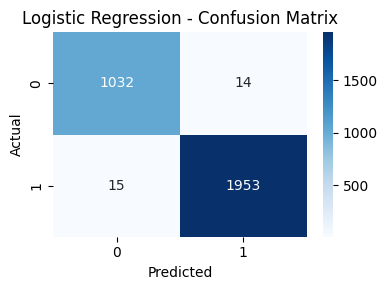

📋 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Female       0.99      0.99      0.99      1046
        Male       0.99      0.99      0.99      1968

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



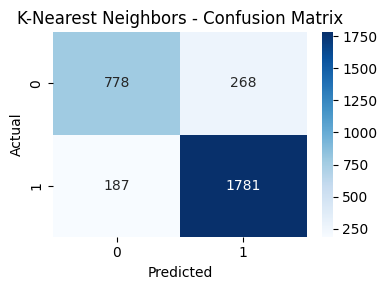

📋 Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

      Female       0.81      0.74      0.77      1046
        Male       0.87      0.90      0.89      1968

    accuracy                           0.85      3014
   macro avg       0.84      0.82      0.83      3014
weighted avg       0.85      0.85      0.85      3014



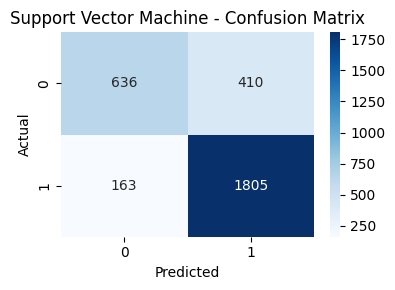

📋 Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

      Female       0.80      0.61      0.69      1046
        Male       0.81      0.92      0.86      1968

    accuracy                           0.81      3014
   macro avg       0.81      0.76      0.78      3014
weighted avg       0.81      0.81      0.80      3014



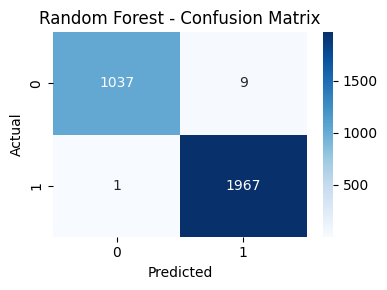

📋 Classification Report for Random Forest:

              precision    recall  f1-score   support

      Female       1.00      0.99      1.00      1046
        Male       1.00      1.00      1.00      1968

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



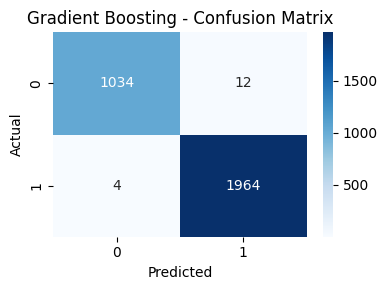

📋 Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

      Female       1.00      0.99      0.99      1046
        Male       0.99      1.00      1.00      1968

    accuracy                           0.99      3014
   macro avg       1.00      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:55:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


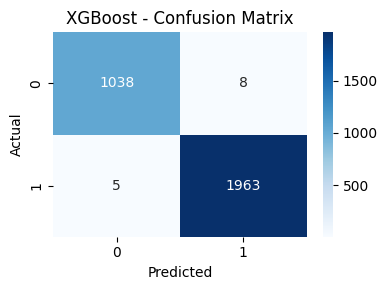

📋 Classification Report for XGBoost:

              precision    recall  f1-score   support

      Female       1.00      0.99      0.99      1046
        Male       1.00      1.00      1.00      1968

    accuracy                           1.00      3014
   macro avg       1.00      0.99      1.00      3014
weighted avg       1.00      1.00      1.00      3014


🔍 Model Performance Comparison:

                    Model  Accuracy  Precision    Recall  F1-Score
3           Random Forest  0.996682   0.995445  0.999492  0.997465
5                 XGBoost  0.995687   0.995941  0.997459  0.996700
4       Gradient Boosting  0.994691   0.993927  0.997967  0.995943
0     Logistic Regression  0.990378   0.992883  0.992378  0.992630
1     K-Nearest Neighbors  0.849038   0.869204  0.904980  0.886731
2  Support Vector Machine  0.809887   0.814898  0.917175  0.863017


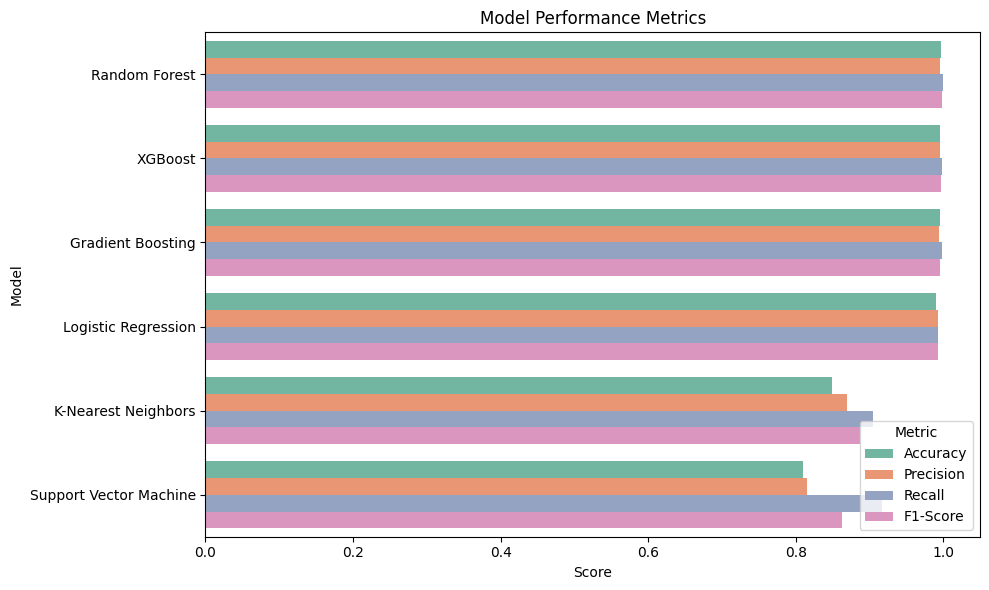

In [48]:

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
metrics = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print(f"📋 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Female", "Male"]))

# Results DataFrame
results_df = pd.DataFrame(metrics).sort_values(by="F1-Score", ascending=False)
print("\n🔍 Model Performance Comparison:\n")
print(results_df)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="value", y="Model", hue="variable", palette="Set2")
plt.title("Model Performance Metrics")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [49]:
import joblib

joblib.dump(models["Gradient Boosting"],"Gradient Boosting.pkl")

 

['Gradient Boosting.pkl']

In [50]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [51]:
joblib.dump(models["Random Forest"],"Random Forest.pkl")


['Random Forest.pkl']

In [52]:
joblib.dump(models["XGBoost"],"xgboost.pkl")

['xgboost.pkl']